# Análisis de frecuencia natural

In [1]:
from model import *

In [2]:
y0 = [0.1, 0.1, 0.1, 0, 0, 0]
t = np.linspace(0, 1000, 20001)
tmin, tmax = 2000, 2400

In [3]:
def equation_matrix(m, r, k):
    return np.array([[0, 1, 0, 0, 0, 0],
                     [-(k['1'] + k['1,2'])/m['1'], -r['1']/m['1'], k['1,2']/m['1'], 0, 0, 0],
                     [0, 0, 0, 1, 0, 0],
                     [k['1,2']/m['2'], 0, -(k['2'] + k['1,2'] + k['2,3'])/m['2'], -r['2']/m['2'], k['2,3']/m['2'], 0],
                     [0, 0, 0, 0, 0, 1],
                     [0, 0, k['2,3']/m['3'], 0, -(k['3'] + k['2,3'])/m['3'], -r['3']/m['3']]])

In [4]:
def vibration_vector(sol):
    x1, x2, x3, v1, v2, v3 = sol[:,0], sol[:,1], sol[:,2], sol[:,3], sol[:,4], sol[:,5]
    vector =  [np.max(x1) - np.min(x1),
               np.max(v1) - np.min(v1),
               np.max(x2) - np.min(x2),
               np.max(v2) - np.min(v2),
               np.max(x3) - np.min(x3),
               np.max(v3) - np.min(v3)]
    return vector / np.max(vector)

In [5]:
def eigenmodes(v, idxs):
    ems = []
    for idx in idxs:
        em = np.abs(v[:,idx])
        em /= np.max(em)
        ems.append(em)
    return ems

## Vibración tipo pecho

In [6]:
m = {'1': 0.125, '2': 0.025, '3': 0.005} # g
d = {'1': 0.25, '2': 0.05, '3': 0.01} # cm
r = {'1': 0.02, '2': 0.005, '3': 0.005} # g/ms
k = {'1': 0.08, '2': 0.008, '3': 0.01, '1,2': 0.025, '2,3': 0.01} # g/ms^2
c = {'1': 3 * k['1'], '2': 3 * k['2'], '3': 3 * k['3']} # g/ms^2
a0 = {'1': 0.05, '2': 0.05, '3': 0.05} # cm^2
l = 1.4 # cm
rho = 0.00113 # g/cm^3
Ps = 0.008 # g/cm ms^2

In [7]:
sol = odeint(model, y0, t, args=(m, d, r, k, c, a0, l, Ps))

In [8]:
chest_matrix = equation_matrix(m, r, k)

In [9]:
w, v = np.linalg.eig(chest_matrix)

In [10]:
1000 * np.abs(np.imag(w)) / (2 * np.pi)

array([318.66115042, 318.66115042, 204.25134268, 204.25134268,
       123.83344645, 123.83344645])

In [11]:
chest = vibration_vector(sol[2000:2400])
ems = eigenmodes(v, [4, 2, 0])

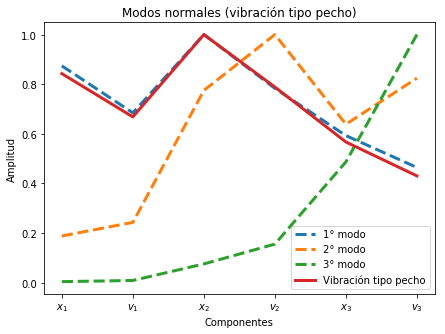

In [12]:
x_ticks_labels = [None, '$x_1$', '$v_1$', '$x_2$', '$v_2$', '$x_3$', '$v_3$']

plt.figure(figsize=(7,5))
plt.plot(ems[0], '--', linewidth=3, label='1° modo')
plt.plot(ems[1], '--' , linewidth=3, label='2° modo')
plt.plot(ems[2], '--' , linewidth=3, label='3° modo')
plt.plot(chest, linewidth=3, label='Vibración tipo pecho')
plt.title('Modos normales (vibración tipo pecho)')
plt.xlabel('Componentes')
plt.ylabel('Amplitud')
plt.legend()
ax = plt.gca()
ax.set_xticklabels(x_ticks_labels)
plt.show()

## Vibración tipo falsete

In [13]:
m = {'1': 0.125, '2': 0.025, '3': 0.005} # g
d = {'1': 0.25, '2': 0.05, '3': 0.01} # cm
r = {'1': 0.02, '2': 0.005, '3': 0.005} # g/ms
k = {'1': 0.08, '2': 0.08, '3': 0.01, '1,2': 0.025, '2,3': 0.01} # g/ms^2
c = {'1': 3 * k['1'], '2': 3 * k['2'], '3': 3 * k['3']} # g/ms^2
a0 = {'1': 0.05, '2': 0.05, '3': 0.05} # cm^2
l = 1.4 # cm
rho = 0.00113 # g/cm^3
Ps = 0.008 # g/cm ms^2

In [14]:
sol = odeint(model, y0, t, args=(m, d, r, k, c, a0, l, Ps))

In [15]:
falsetto_matrix = equation_matrix(m, r, k)

In [16]:
w, v = np.linalg.eig(falsetto_matrix)

In [17]:
1000 * np.abs(np.imag(w)) / (2 * np.pi)

array([140.34936452, 140.34936452, 352.87166281, 352.87166281,
       294.68651608, 294.68651608])

In [18]:
falsetto = vibration_vector(sol[2000:2400])
ems = eigenmodes(v, [0, 4, 2])

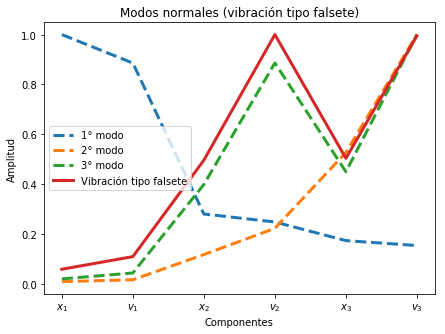

In [19]:
plt.figure(figsize=(7,5))
plt.plot(ems[0], '--', linewidth=3, label='1° modo')
plt.plot(ems[1], '--' , linewidth=3, label='2° modo')
plt.plot(ems[2], '--' , linewidth=3, label='3° modo')
plt.plot(falsetto, linewidth=3, label='Vibración tipo falsete')
plt.title('Modos normales (vibración tipo falsete)')
plt.xlabel('Componentes')
plt.ylabel('Amplitud')
plt.legend()
ax = plt.gca()
ax.set_xticklabels(x_ticks_labels)
plt.show()